### The full visualization is only supported for the following model
```MPUR-policy-deterministic-model=vae-zdropout=0.5-nfeature=256-bsize=6-npred=30-ureg=0.05-lambdal=0.2-lambdaa=0.0-gamma=0.99-lrtz=0.0-updatez=0-inferz=0-learnedcost=1-seed=3-novaluestep25000.model```

* Seed must be equal 3
* Checkpoint 2400


In [13]:
%matplotlib notebook

Traceback (most recent call last):
  File "/home/us441/vlad/miniconda3/envs/PPUU/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/us441/vlad/miniconda3/envs/PPUU/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/home/us441/vlad/miniconda3/envs/PPUU/lib/python3.7/site-packages/matplotlib/_pylab_helpers.py", line 53, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "/home/us441/vlad/miniconda3/envs/PPUU/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/us441/vlad/miniconda3/envs/PPUU/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/home/

Select(description='Experiments', layout=Layout(border='solid', width='500px'), options=('Stochastic', 'Determ…

Dropdown(description='Seed:', options=(), value=None)

Dropdown(description='Checkpoint:', options=(), value=None)

Dropdown(description='Successful Episode:', options=(), value=None)

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, marks=[Pie(colors=['green', 'red'], font…

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='300', width='100%'…

<IPython.core.display.Javascript object>


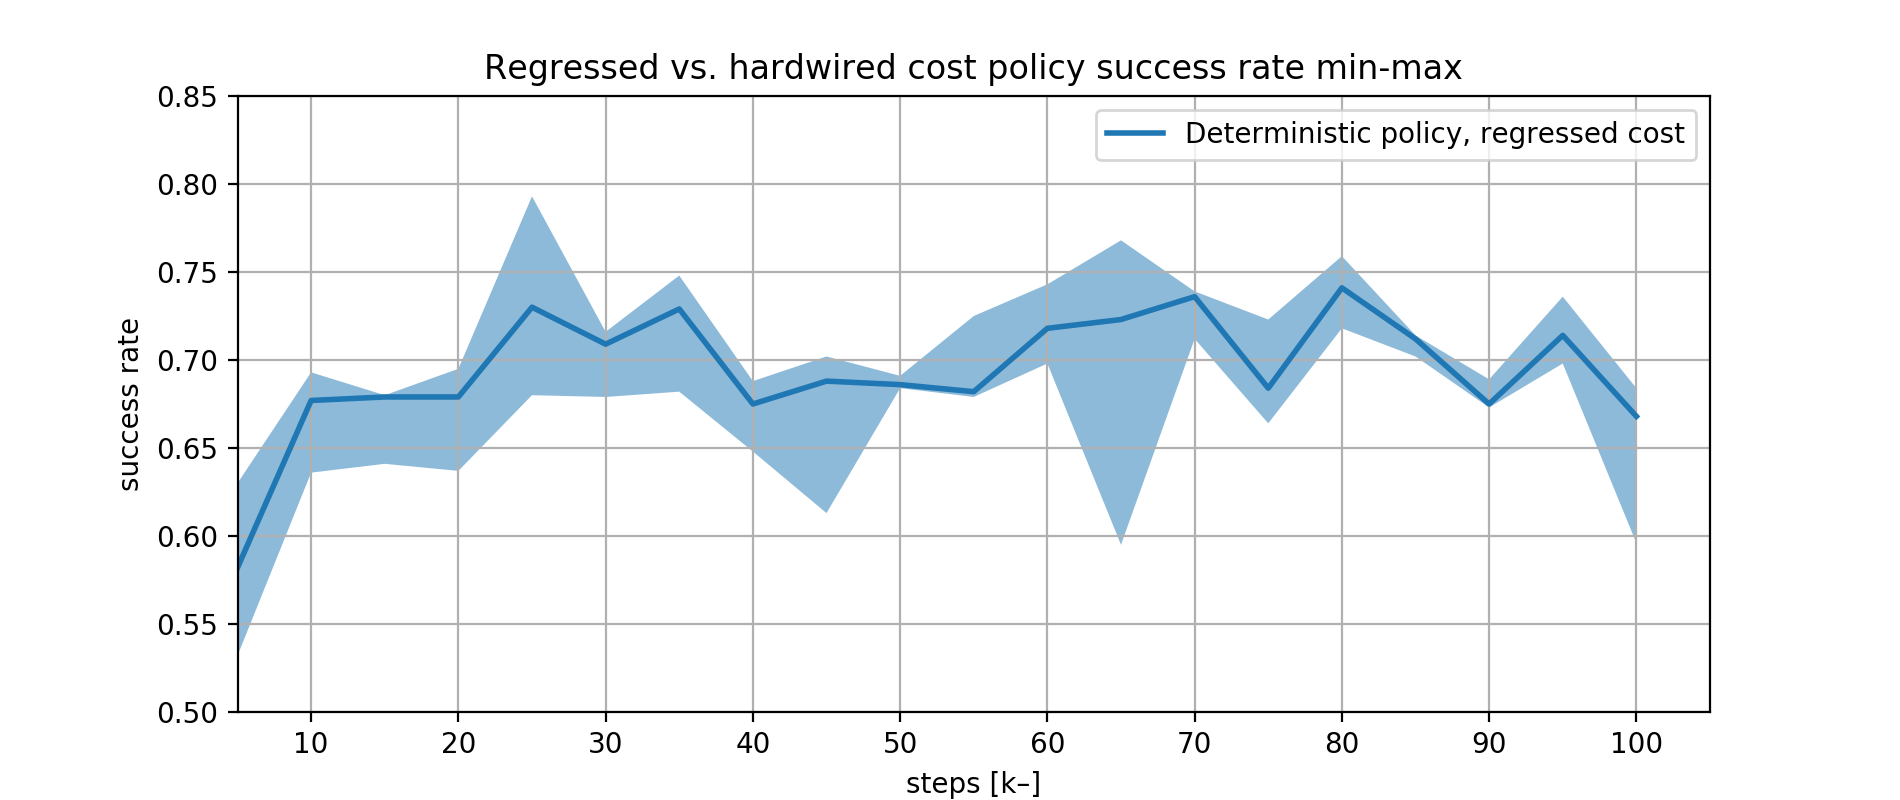

Button(description='Clean the plot', style=ButtonStyle())

<IPython.core.display.Javascript object>


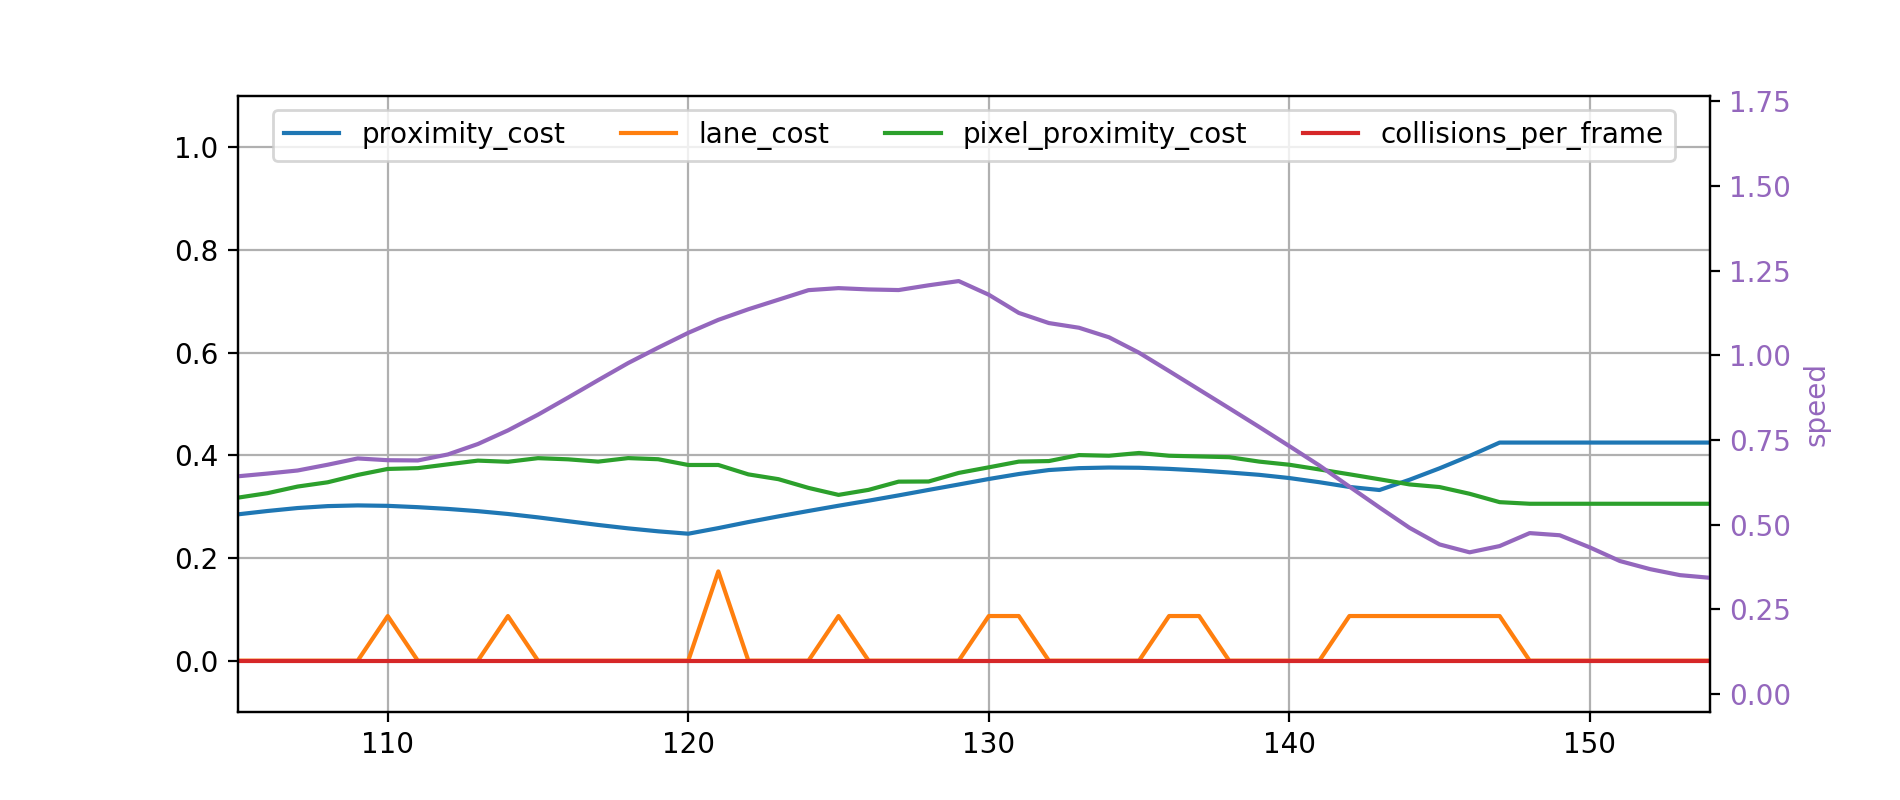

value is  17
states len is 560


In [28]:
import VisualizationLibrary
import importlib
importlib.reload(VisualizationLibrary)

v = VisualizationLibrary.Visualization()
v.display()